In [ ]:
%pip install -q ipywidgets
%pip install -q ipympl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import IntSlider
from matplotlib.widgets import Button, Slider
from ipywidgets import IntText, link

In [2]:
%matplotlib widget

In [46]:
def abc(P, a, b, c):
    """Das abc-Modell
    """
    assert(a+b<=1)
    assert(c<=1)
    df = pd.DataFrame(columns=["P","Q","Qd","Qb"], index=np.arange(len(P)), dtype="float")
    df["P"] = P
    # Fuer den Grundwassspeicher G muessen wir einen Startwert annehmen.
    G = 5.
    # Ergebniscontainer fuer den Gesamtabfluss
    Q = np.repeat(0.,len(P))
    Gw = np.repeat(0.,len(P))
    #G = np.repeat(0,len(P))
    for i in range(len(P)):
        df.loc[i,"Q"] = (1-a-b) * P[i] + c * G
        df.loc[i,"Qd"] = (1-a-b) * P[i]
        df.loc[i,"Qb"] = c * G
        G = (1-c)*G + a*P[i]
    return df
    #return pd.DataFrame({"P":P, "Q":Q, "Qb":Qb, "Qd":Qd}, index=t)
P = np.array([0,0,0,10,0,0,0,10,0,0,0,0,0,0,0])
t = np.arange(len(P))
sim = abc(P, 0.1, 0.1, 0.2)

0

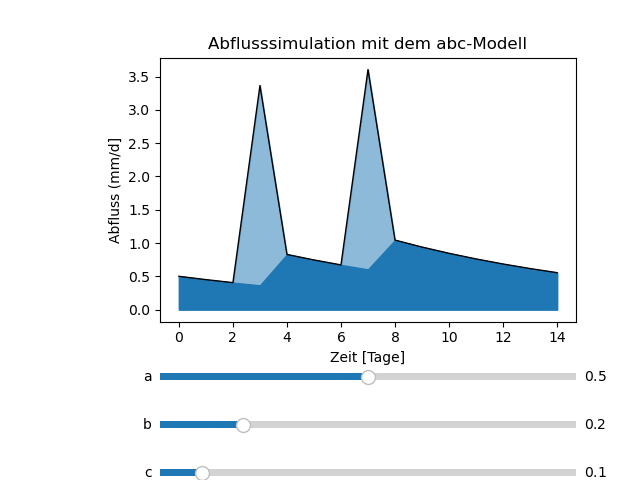

In [48]:
# Define initial parameters
apar = 0.5
bpar = 0.2
cpar = 0.1
sim = abc(P, apar, bpar, cpar)

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(num=" ")
fillQ = plt.fill_between(t, sim.Q, color="tab:blue", alpha=0.5)
fillQb =plt.fill_between(t, sim.Qb, color="tab:blue", alpha=1.)
line, = ax.plot(t, sim.Q, lw=1, color="black")
ax.set_xlabel('Zeit [Tage]')
plt.ylabel("Abfluss (mm/d]")
plt.title("Abflusssimulation mit dem abc-Modell")


# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.33)

# Make a horizontal slider to control a.
axa = fig.add_axes([0.25, 0.2, 0.65, 0.03])
a_slider = Slider(
    ax=axa,
    label='a',
    valmin=0.,
    valmax=1.,
    valinit=apar,
)

# Make a horizontal slider to control b.
axb = fig.add_axes([0.25, 0.1, 0.65, 0.03])
b_slider = Slider(
    ax=axb,
    label='b',
    valmin=0.,
    valmax=1.,
    valinit=bpar,
)

# Make a horizontal slider to control b.
axc = fig.add_axes([0.25, 0.0, 0.65, 0.03])
c_slider = Slider(
    ax=axc,
    label='c',
    valmin=0.,
    valmax=1.,
    valinit=cpar,
)

# The function to be called anytime a slider's value changes
# def update(val):
#     line.set_ydata(abc(P, a_slider.val, b_slider.val, c_slider.val).Q)
#     fig.canvas.draw_idle()

def update(val): 
    sim = abc(P, a_slider.val, b_slider.val, c_slider.val)
    line.set_ydata(sim.Q)
    #optional preventing autoscaling of y-axis 
    ax.autoscale(False)
    #create invisible dummy object to extract the vertices 
    dummyQ = plt.fill_between(t, sim.Q , alpha=0)
    dpQ = dummyQ.get_paths()[0]
    dummyQ.remove()
    fillQ.set_paths([dpQ.vertices])
    
    dummyQb = plt.fill_between(t, sim.Qb , alpha=0)
    dpQb = dummyQb.get_paths()[0]
    dummyQb.remove()
    #update the vertices of the PolyCollection
    fillQb.set_paths([dpQb.vertices])
    fig.canvas.draw_idle()


# register the update function with each slider
a_slider.on_changed(update)
b_slider.on_changed(update)
c_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, -0.2, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    a_slider.reset()
    b_slider.reset()
    c_slider.reset()
button.on_clicked(reset)